In [1]:
# import required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set()

In [2]:
# Read the previous csv files as dataframes: titles_crew_pre

titles=pd.read_csv('titles.csv').drop(['Unnamed: 0'],axis=1)
titles_crew=pd.read_csv('titles_crew.csv').drop(['Unnamed: 0'],axis=1)

### Working on 'titles' dataset

Our dataset contains many titles with very few number of votes. As these observations lead to lower quality data, we will consider only the titles with number of votes more than 1000.

In [3]:
titles = titles.drop(titles[(titles.numVotes<=1000)].index).reset_index(drop=True)
titles_crew = titles_crew.drop(titles_crew[(titles_crew.numVotes<=1000)].index).reset_index(drop=True)

In order to analyse the effect of genres, genre entries are needed to be separated into different columns

In [4]:
# Generate a unique list of genres
genre_pre_list=list(titles.genres.unique())
genre_list=set([])
for i in genre_pre_list:
    i=str(i).split(",")
    for n in i:
        genre_list.add(n)
        
# Add columns to titles dataframe for different genres along with true/false values
for genre in genre_list:
    titles["genre_"+genre]= titles['genres'].str.contains(genre)

In [5]:
titles.head()

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes,roundRating,genre_Mystery,genre_Comedy,genre_Animation,...,genre_Music,genre_Action,genre_Musical,genre_Fantasy,genre_Crime,genre_Western,genre_Sci-Fi,genre_Sport,genre_Drama,genre_Documentary
0,tt0035423,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,6.0,False,True,False,...,False,False,False,True,False,False,False,False,False,False
1,tt0111068,1999,127.0,"Action,Drama,Thriller",7.1,4740,7.0,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,tt0168501,1999,120.0,"Comedy,Drama,Romance",6.7,8317,7.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,tt0168504,2000,101.0,"Action,Comedy,Crime",5.7,1450,6.0,False,True,False,...,False,True,False,False,True,False,False,False,False,False
4,tt0168786,2002,120.0,"Biography,Drama",7.3,30259,7.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [6]:
# Number of NaN values in genres column
titles.genres.isnull().sum()

0

As seen above, there are no NaN values.

Some of the genres might be applicable to few titles. We will check for such titles and delete the columns for genre entries which are applicable to less than 100 titles.

In [7]:
# Check number of titles to which each genre entry is applicable
titles.sum()

tconst               tt0035423tt0111068tt0168501tt0168504tt0168786t...
startYear                                                     17159729
runtimeMinutes                                                  871678
genres               Comedy,Fantasy,RomanceAction,Drama,ThrillerCom...
averageRating                                                  52210.5
numVotes                                                     394789666
roundRating                                                      52195
genre_Mystery                                                      692
genre_Comedy                                                      2979
genre_Animation                                                    362
genre_War                                                          135
genre_Thriller                                                    1505
genre_Romance                                                     1422
genre_History                                                      253
genre_

In [8]:
# Drop the genre columns that are applicable for lesser than 100 titles

titles.drop([col for col, val in titles.iloc[:,7:].sum().iteritems() if val < 100], axis=1, inplace=True)

### Working on titles_crew dataset

In [9]:
titles_crew.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,title,region,language,averageRating,numVotes,nconst,category,primaryName,birthYear,deathYear,primaryProfession
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0107463,editor,David Brenner,NaN,NaN,"editor,editorial_department"
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0000212,actress,Meg Ryan,1961.0,NaN,"actress,producer,soundtrack"
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0413168,actor,Hugh Jackman,1968.0,NaN,"actor,soundtrack,producer"
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0000630,actor,Liev Schreiber,1967.0,NaN,"actor,producer,miscellaneous"
4,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,73337,nm0005227,actor,Breckin Meyer,1974.0,NaN,"actor,writer,producer"


In [10]:
# Inspecting columns that can be dropped, as they do not provide any value to the obervations

print(titles_crew.titleType.value_counts())
print(titles_crew.region.value_counts())
print(titles_crew.language.value_counts())

movie    84023
Name: titleType, dtype: int64
US    84023
Name: region, dtype: int64
en    843
es     70
Name: language, dtype: int64


In [11]:
titles_crew.drop(['titleType','region','language','originalTitle','title'], axis=1,inplace=True)

Next, we want to unmelt titles_crew dataset so that each of the crew 'category' is a column name with 'nconst' listed under it.
First, we find the number of times a category is appearing. We will consider only the categories appearing more than 1000 times under the assumption that lesser than that will not aid in our analysis.

In [12]:
# Number of times the category values appear in the dataset
titles_crew.category.value_counts()

actor                  19863
producer               15888
actress                12016
writer                 11582
director                8927
composer                6047
cinematographer         4058
editor                  2459
self                    2182
production_designer      741
archive_footage          259
archive_sound              1
Name: category, dtype: int64

We will drop the categories production_designer, archive_footage and archive_sound, as it does not appear frequently.
<br> One of the categories, as seen above is 'self'. In order to handle it appropriately, we look at the corresponding titles.

In [13]:
# Drop the categories archive_footage amd archive_sound from the dataset
titles_crew = titles_crew.drop((titles_crew[(titles_crew.category=='production_designer') | (titles_crew.category=='archive_footage') | (titles_crew.category=='archive_sound')]).index).reset_index(drop=True)
titles_crew.category.value_counts()

actor              19863
producer           15888
actress            12016
writer             11582
director            8927
composer            6047
cinematographer     4058
editor              2459
self                2182
Name: category, dtype: int64

In [14]:
# Analyse titles containing 'self' as a category 
titles_crew[titles_crew.category=='self'].head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category,primaryName,birthYear,deathYear,primaryProfession
542,tt0179074,American Pimp,1999,87.0,Documentary,6.6,2072,nm2568504,self,John S. Dickson,NaN,NaN,NaN
754,tt0181810,Sex: The Annabel Chong Story,1999,86.0,Documentary,5.6,1269,nm0159026,self,Annabel Chong,1972.0,NaN,actress
755,tt0181810,Sex: The Annabel Chong Story,1999,86.0,Documentary,5.6,1269,nm0094217,self,John T. Bone,1947.0,NaN,"director,producer,costume_department"
756,tt0181810,Sex: The Annabel Chong Story,1999,86.0,Documentary,5.6,1269,nm0694528,self,Ed Powers,1954.0,NaN,"actor,director,producer"
757,tt0181810,Sex: The Annabel Chong Story,1999,86.0,Documentary,5.6,1269,nm0909971,self,Walter Williams,NaN,NaN,NaN


In [15]:
len(titles_crew[titles_crew.category=='self'].tconst.unique())

637

On checking few of these titles on imdb, it was evident that most of these titles are documentaries, and 'self' means the person played themselves in the movie. We should treat the 'self' categories as 'actor' or 'actress', but we don't know when is it 'actor' or 'actress'. 
Also, there are a total of 637 unique titles with 'self' category, which is a huge number considering total of 8540 unique titles. So we cannot delete these observations.

Considering above, we are just leaving the 'self' column as it is.


In [16]:
# Pivoting crew details
t = titles_crew.pivot_table(index='tconst',columns='category',values='nconst',aggfunc=",".join).reset_index()
t.head()

category,tconst,actor,actress,cinematographer,composer,director,editor,producer,self,writer
0,tt0035423,"nm0413168,nm0000630,nm0005227",nm0000212,nm0238698,nm0448843,nm0003506,nm0107463,nm0465298,NaN,nm0737216
1,tt0111068,"nm0474774,nm0709359,nm0694986",nm0006689,NaN,nm1269729,nm0151511,NaN,nm0080319,NaN,"nm0080315,nm0223475,nm0365383"
2,tt0168501,"nm0004875,nm0004820,nm0674782",nm0000505,nm0697910,nm0006010,nm0002700,NaN,"nm0140011,nm0457757,nm0000490",NaN,NaN
3,tt0168504,"nm0007045,nm0174780,nm0034492,nm0354469",NaN,nm0003394,nm0443867,NaN,nm0867498,"nm0298181,nm0336925,nm0852423",NaN,NaN
4,tt0168786,"nm0000243,nm1035682,nm1287636",nm0117146,nm0003542,nm0002217,NaN,nm0119322,"nm0085542,nm0354279",NaN,nm0279376


We have to join above dataframe with 'title'. Before that we need to check if number of observations are same in both dataframes.

In [17]:
t.shape

(8540, 10)

In [18]:
titles.shape

(8540, 26)

In [19]:
titles = pd.merge(titles,t,on='tconst',how='left')

In [20]:
titles.shape

(8540, 35)

In [21]:
titles.head(10)

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes,roundRating,genre_Mystery,genre_Comedy,genre_Animation,...,genre_Documentary,actor,actress,cinematographer,composer,director,editor,producer,self,writer
0,tt0035423,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,6.0,False,True,False,...,False,"nm0413168,nm0000630,nm0005227",nm0000212,nm0238698,nm0448843,nm0003506,nm0107463,nm0465298,NaN,nm0737216
1,tt0111068,1999,127.0,"Action,Drama,Thriller",7.1,4740,7.0,False,False,False,...,False,"nm0474774,nm0709359,nm0694986",nm0006689,NaN,nm1269729,nm0151511,NaN,nm0080319,NaN,"nm0080315,nm0223475,nm0365383"
2,tt0168501,1999,120.0,"Comedy,Drama,Romance",6.7,8317,7.0,False,True,False,...,False,"nm0004875,nm0004820,nm0674782",nm0000505,nm0697910,nm0006010,nm0002700,NaN,"nm0140011,nm0457757,nm0000490",NaN,NaN
3,tt0168504,2000,101.0,"Action,Comedy,Crime",5.7,1450,6.0,False,True,False,...,False,"nm0007045,nm0174780,nm0034492,nm0354469",NaN,nm0003394,nm0443867,NaN,nm0867498,"nm0298181,nm0336925,nm0852423",NaN,NaN
4,tt0168786,2002,120.0,"Biography,Drama",7.3,30259,7.0,False,False,False,...,False,"nm0000243,nm1035682,nm1287636",nm0117146,nm0003542,nm0002217,NaN,nm0119322,"nm0085542,nm0354279",NaN,nm0279376
5,tt0168856,2000,80.0,"Adventure,Animation,Comedy",5.9,5233,6.0,False,True,True,...,False,"nm0052051,nm0845310,nm0449881,nm0422205",NaN,NaN,NaN,"nm0280745,nm0544337,nm0233036,nm0373798",NaN,NaN,NaN,"nm0478172,nm1202109"
6,tt0168987,1999,101.0,"Comedy,Drama,Romance",6.1,7344,6.0,False,True,False,...,False,NaN,"nm0187724,nm0245507,nm0184965,nm0531612",nm0004545,nm0171046,nm0923768,nm0333315,nm0569703,NaN,nm0860588
7,tt0169102,2001,224.0,"Adventure,Drama,Musical",8.1,91169,8.0,False,False,False,...,False,"nm0451148,nm0944834","nm0961737,nm0791226",nm0576540,nm0006246,nm0332950,NaN,NaN,NaN,"nm1021349,nm1021353,nm1022153"
8,tt0169299,1999,124.0,"Comedy,Horror",6.2,4501,6.0,False,True,False,...,False,"nm0444687,nm0442207,nm0351772",nm0490348,nm0283655,nm0605629,NaN,NaN,nm0381230,NaN,"nm0144236,nm0118348,nm0348181"
9,tt0169547,1999,122.0,Drama,8.4,974630,8.0,False,False,False,...,False,"nm0000228,nm0004747","nm0000906,nm0000301",nm0005734,nm0002353,nm0005222,NaN,"nm0169260,nm0423134",NaN,nm0050332


Next, we need to workout the possible features for our model:
1. Number of each category of cast/crew in each title
2. Sum of cast members. Cast members would be actor, actress, and self categories. Remaining are being referred to as crew.
3. Ratio of male actors to female actress
4. Workout individual ratings of each cast/crew on the basis of the ratings of movies they are associated with. 
    <p>i) Aggregate the ratings by mean and max separately

Next we will perform EDA to assess the effect of each of these on movie ratings

In [64]:
# Add columns for:
    # i) count of cast/crew members in each category
    # ii) count of cast
    # iii) ratio of actor and actress
titles['count_actor'] = titles.actor.str.split(',').str.len().fillna(0)
titles['count_actress'] = titles.actress.str.split(',').str.len().fillna(0)
titles['count_cinematographer'] = titles.cinematographer.str.split(',').str.len().fillna(0)
titles['count_composer'] = titles.composer.str.split(',').str.len().fillna(0)
titles['count_director'] = titles.director.str.split(',').str.len().fillna(0)
titles['count_editor'] = titles.editor.str.split(',').str.len().fillna(0)
titles['count_producer'] = titles.producer.str.split(',').str.len().fillna(0)
titles['count_writer'] = titles.writer.str.split(',').str.len().fillna(0)
titles['count_self'] = titles.self.str.split(',').str.len().fillna(0)
titles['cast_total'] = titles.count_actor+titles.count_actress+titles.count_self
titles['crew_total'] = titles.count_cinematographer+titles.count_composer+titles.count_director+titles.count_editor\
+titles.count_producer+titles.count_writer
titles['actor_ratio'] = (titles.count_actor/titles.count_actress).replace(np.inf,0)

titles.head()

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes,roundRating,genre_Mystery,genre_Comedy,genre_Animation,...,count_cinematographer,count_composer,count_director,count_editor,count_producer,count_writer,count_self,cast_total,crew_total,actor_ratio
0,tt0035423,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,6.0,False,True,False,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,6.0,3.0
1,tt0111068,1999,127.0,"Action,Drama,Thriller",7.1,4740,7.0,False,False,False,...,0.0,1.0,1.0,0.0,1.0,3.0,0.0,4.0,6.0,3.0
2,tt0168501,1999,120.0,"Comedy,Drama,Romance",6.7,8317,7.0,False,True,False,...,1.0,1.0,1.0,0.0,3.0,0.0,0.0,4.0,6.0,3.0
3,tt0168504,2000,101.0,"Action,Comedy,Crime",5.7,1450,6.0,False,True,False,...,1.0,1.0,0.0,1.0,3.0,0.0,0.0,4.0,6.0,0.0
4,tt0168786,2002,120.0,"Biography,Drama",7.3,30259,7.0,False,False,False,...,1.0,1.0,0.0,1.0,2.0,1.0,0.0,4.0,6.0,3.0


Below, we will workout the ratings of the cast/crew

In [23]:
titles_crew.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category,primaryName,birthYear,deathYear,primaryProfession
0,tt0035423,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,nm0107463,editor,David Brenner,NaN,NaN,"editor,editorial_department"
1,tt0035423,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,nm0000212,actress,Meg Ryan,1961.0,NaN,"actress,producer,soundtrack"
2,tt0035423,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,nm0413168,actor,Hugh Jackman,1968.0,NaN,"actor,soundtrack,producer"
3,tt0035423,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,nm0000630,actor,Liev Schreiber,1967.0,NaN,"actor,producer,miscellaneous"
4,tt0035423,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,nm0005227,actor,Breckin Meyer,1974.0,NaN,"actor,writer,producer"


Now, we will work out the ratings of cast/crew on the basis of the ratings of movies they have worked on. The steps involved:
1. Create a dataset with all cast/crew and the movie ratings
2. Aggregate the ratings for each cast/crew. For aggregating, we are creating 2 separate datasets, one using mean, another using max as aggregation. Later we will check which aggregation wrks better and will kep only one of those.
3. Any cast/crew that has worked in a single movie will be assigned a NaN rating to avoid data leakage.

In [24]:
# Create a dataset for all cast/crew that has appeared in a single movie

temp = pd.DataFrame(titles_crew.nconst.value_counts()).reset_index()
temp = temp.rename(columns={"index":"nconst","nconst":"single"})
temp=temp.drop(temp[temp.single!=1].index).reset_index(drop=True)
temp.head()

,nconst,single
0,nm4308614,1
1,nm3056196,1
2,nm1429239,1
3,nm1103509,1
4,nm3645051,1


In [25]:
# Create a data frame of actors with their average ratings on the basis of their moie ratings
actorRating = pd.DataFrame(titles_crew.iloc[:,[5,7]].copy().groupby('nconst')['averageRating'].mean().round(1)).reset_index()
actorRating.columns = ['nconst','castCrewRating']

actorRating.head()

,nconst,castCrewRating
0,nm0000002,6.5
1,nm0000008,6.8
2,nm0000018,5.6
3,nm0000025,6.3
4,nm0000032,8.0


In [26]:
# Replace single movie appearance cast/crew rating with NaN

actorRating = pd.merge(actorRating,temp,on = 'nconst', how='left').fillna(0)
actorRating['single']=actorRating.single.replace(1,float('NaN'))
actorRating['rating'] = actorRating['castCrewRating'].add(actorRating['single'])
actorRating.castCrewRating = actorRating.rating
actorRating.drop(['single','rating'],axis=1,inplace=True)
actorRating.head()

,nconst,castCrewRating
0,nm0000002,6.5
1,nm0000008,NaN
2,nm0000018,NaN
3,nm0000025,6.3
4,nm0000032,NaN


In [27]:
# Add a column for cast/crew rating
titles_crew = pd.merge(titles_crew,actorRating,on='nconst',how='left')
titles_crew.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category,primaryName,birthYear,deathYear,primaryProfession,castCrewRating
0,tt0035423,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,nm0107463,editor,David Brenner,NaN,NaN,"editor,editorial_department",6.7
1,tt0035423,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,nm0000212,actress,Meg Ryan,1961.0,NaN,"actress,producer,soundtrack",5.7
2,tt0035423,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,nm0413168,actor,Hugh Jackman,1968.0,NaN,"actor,soundtrack,producer",7.0
3,tt0035423,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,nm0000630,actor,Liev Schreiber,1967.0,NaN,"actor,producer,miscellaneous",6.5
4,tt0035423,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",6.4,73337,nm0005227,actor,Breckin Meyer,1974.0,NaN,"actor,writer,producer",5.5


In [28]:
ratingMean = titles_crew.pivot_table(index=['tconst','averageRating'],columns='category',values='castCrewRating',aggfunc=np.nanmean).reset_index()
ratingMean['cast'] = np.nanmean([ratingMean.actor,ratingMean.actress,ratingMean.self],axis=0).round(1)
ratingMean['crew'] = np.nanmean([ratingMean.cinematographer,ratingMean.composer,ratingMean.director,ratingMean.editor,ratingMean.producer,ratingMean.writer],axis=0).round(1)

ratingMean.head()

C:\Users\sony\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1062: RuntimeWarning: Mean of empty slice
  f = lambda x: func(x, *args, **kwargs)
C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


category,tconst,averageRating,actor,actress,cinematographer,composer,director,editor,producer,self,writer,cast,crew
0,tt0035423,6.4,6.333333,5.7,6.2,6.4,7.2,6.7,6.900000,NaN,6.7,6.0,6.7
1,tt0111068,7.1,6.466667,6.5,NaN,7.4,7.0,NaN,5.800000,NaN,6.1,6.5,6.6
2,tt0168501,6.7,6.000000,5.7,6.6,6.1,5.9,NaN,6.433333,NaN,NaN,5.8,6.3
3,tt0168504,5.7,5.400000,NaN,6.5,NaN,NaN,NaN,5.800000,NaN,NaN,5.4,6.2
4,tt0168786,7.3,6.650000,6.2,6.7,6.7,NaN,5.9,6.600000,NaN,6.7,6.4,6.5


In [29]:
ratingMax = titles_crew.pivot_table(index=['tconst','averageRating'],columns='category',values='castCrewRating',aggfunc=np.nanmax).reset_index()
ratingMax['cast'] = np.nanmax([ratingMax.actor,ratingMax.actress,ratingMax.self],axis=0)
ratingMax['crew'] = np.nanmax([ratingMax.cinematographer,ratingMax.composer,ratingMax.director,ratingMax.editor,ratingMax.producer,ratingMax.writer],axis=0)

ratingMax.head()

C:\Users\sony\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1062: RuntimeWarning: All-NaN axis encountered
  f = lambda x: func(x, *args, **kwargs)
C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: All-NaN axis encountered
  
C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: All-NaN axis encountered
  This is separate from the ipykernel package so we can avoid doing imports until


category,tconst,averageRating,actor,actress,cinematographer,composer,director,editor,producer,self,writer,cast,crew
0,tt0035423,6.4,7.0,5.7,6.2,6.4,7.2,6.7,6.9,NaN,6.7,7.0,7.2
1,tt0111068,7.1,7.0,6.5,NaN,7.4,7.0,NaN,5.8,NaN,6.7,7.0,7.4
2,tt0168501,6.7,6.2,5.7,6.6,6.1,5.9,NaN,6.6,NaN,NaN,6.2,6.6
3,tt0168504,5.7,5.8,NaN,6.5,NaN,NaN,NaN,5.9,NaN,NaN,5.8,6.5
4,tt0168786,7.3,7.1,6.2,6.7,6.7,NaN,5.9,6.6,NaN,6.7,7.1,6.7


Now we have 3 datasets from containing different features. From these datasets we will assess which features are relevant for us. The three datasets:

In [30]:
print('titles:',titles.columns)
print('ratingMean',ratingMean.columns)
print('ratingMax',ratingMax.columns)

titles: Index(['tconst', 'startYear', 'runtimeMinutes', 'genres', 'averageRating',
       'numVotes', 'roundRating', 'genre_Mystery', 'genre_Comedy',
       'genre_Animation', 'genre_War', 'genre_Thriller', 'genre_Romance',
       'genre_History', 'genre_Biography', 'genre_Adventure', 'genre_Family',
       'genre_Horror', 'genre_Music', 'genre_Action', 'genre_Fantasy',
       'genre_Crime', 'genre_Sci-Fi', 'genre_Sport', 'genre_Drama',
       'genre_Documentary', 'actor', 'actress', 'cinematographer', 'composer',
       'director', 'editor', 'producer', 'self', 'writer', 'count_actor',
       'count_actress', 'count_cinematographer', 'count_composer',
       'count_director', 'count_editor', 'count_producer', 'count_writer',
       'count_self', 'cast_total', 'crew_total', 'actor_ratio'],
      dtype='object')
ratingMean Index(['tconst', 'averageRating', 'actor', 'actress', 'cinematographer',
       'composer', 'director', 'editor', 'producer', 'self', 'writer', 'cast',
       'crew']

We have our datasets ready for analysis. First, let us look at how the genres affect the ratings.

In [31]:
# Slice genre details from titles dataset to a separate dataset: df_genre
df_genre = [col for col in titles if col.startswith('genre_')]
df_genre = titles[df_genre].copy()
df_genre['averageRating'] = titles.averageRating.copy()
df_genre.head()

,genre_Mystery,genre_Comedy,genre_Animation,genre_War,genre_Thriller,genre_Romance,genre_History,genre_Biography,genre_Adventure,genre_Family,genre_Horror,genre_Music,genre_Action,genre_Fantasy,genre_Crime,genre_Sci-Fi,genre_Sport,genre_Drama,genre_Documentary,averageRating
0,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,6.4
1,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,7.1
2,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,6.7
3,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,5.7
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,7.3


In [32]:
# Calculate average rating of each of the genre
genres=[]
rating=[]
for row,col in enumerate(df_genre):
    genres.append(col)
    rating.append(round(df_genre[df_genre[col]==True].averageRating.mean(),2))
genre = pd.DataFrame({'genres':genres[:-1],'rating':rating[:-1]})
genre

,genres,rating
0,genre_Mystery,5.96
1,genre_Comedy,5.94
2,genre_Animation,6.52
3,genre_War,6.75
4,genre_Thriller,5.70
5,genre_Romance,6.20
6,genre_History,6.95
7,genre_Biography,7.01
8,genre_Adventure,6.07
9,genre_Family,6.01


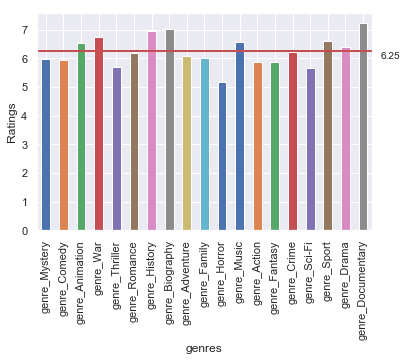

In [33]:
# Plot genre ratings along with mean rating of all genre

genre.plot('genres','rating',kind='bar',legend=False)
plt.axhline(y=np.mean(genre.rating),linewidth=2,color='r')
plt.text(19,6,round(np.mean(genre.rating),2))
plt.ylabel('Ratings')
plt.show()

### Observation

Genres with higher than average rating are - history, biography, war, documentary. So it appears that movies that are based on real life have a higher rating.

Horror movies are rated much lower than average.

In [34]:
# Prepare dataset for plotting violin plot for genre
new = titles.iloc[:,[0,4,3]].copy()
new['A'],new['B'],new['C'] = new.genres.str.split(',',0).str
new = pd.melt(new,id_vars=['tconst','averageRating'],value_vars = ['A','B','C'])
new = new.drop(new[(new.value=='Musical') | (new.value=='Western') | (new.value=='News')].index)
new.head()

,tconst,averageRating,variable,value
0,tt0035423,6.4,A,Comedy
1,tt0111068,7.1,A,Action
2,tt0168501,6.7,A,Comedy
3,tt0168504,5.7,A,Action
4,tt0168786,7.3,A,Biography


C:\Users\sony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


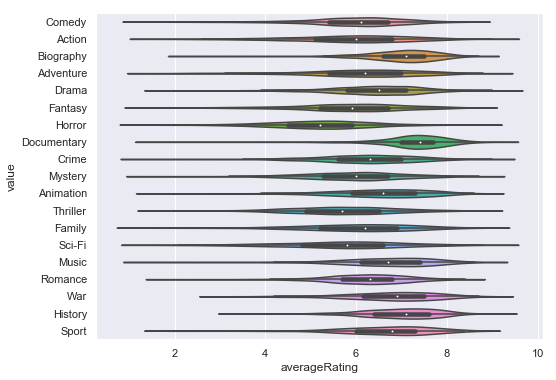

In [35]:
# Plot genre violing plot

from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

sns.violinplot(x='averageRating',y='value',data=new)
plt.show()

C:\Users\sony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


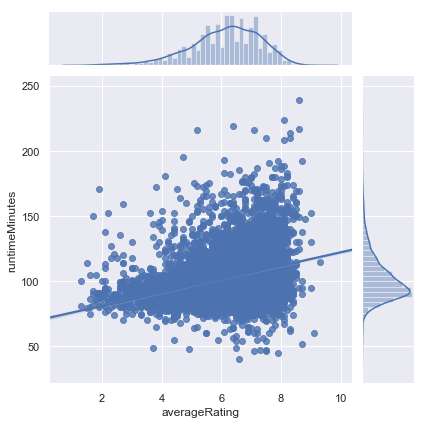

In [36]:
# Plot showing correlation of average rating and runtime minutes
sns.jointplot('averageRating','runtimeMinutes', data=titles,
              kind='reg')
plt.show()

In [37]:
stats.pearsonr(titles[~titles.runtimeMinutes.isnull()].averageRating,titles.runtimeMinutes.dropna())

(0.3325209738604598, 1.8778036115263057e-219)

### Observation:
1. Movie ratings is positively correlated with runtime Minutes. This is evident from the graph as well as the p-value above.
2. Movies with runtime > 175 minutes have better than average ratings

For 3 datasets, we will now plot the heatmaps and calculate the p-values in order to find the correlation between different variables

In [38]:
# Function for calculating p-value matrix for multiple variables

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            df_clean = df.loc[:,[r,c]].dropna()
            pvalues[r][c]=round(stats.pearsonr(df_clean.iloc[:,0], df_clean.iloc[:,1])[1], 4)
    return pvalues

### Titles dataset

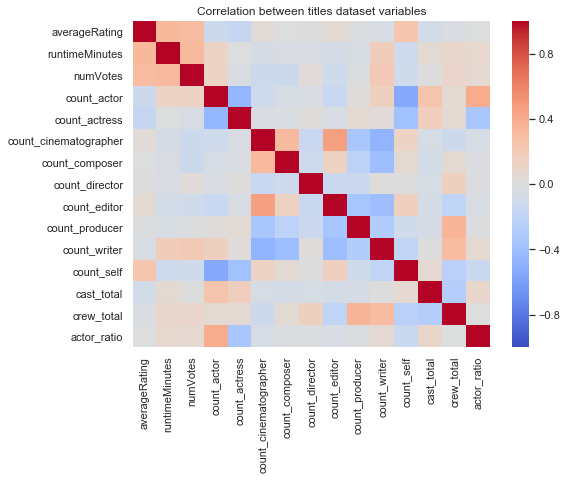

In [66]:
# Filter dataset from titles so as to contain only relevant features
titles_corr = titles.iloc[:,[4,2,5,35,36,37,38,39,40,41,42,43,44,45,46]]

# Plot heatmap
sns.heatmap(titles_corr.corr(),cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlation between titles dataset variables')
plt.show()

In [67]:
titles_corr.corr()

,averageRating,runtimeMinutes,numVotes,count_actor,count_actress,count_cinematographer,count_composer,count_director,count_editor,count_producer,count_writer,count_self,cast_total,crew_total,actor_ratio
averageRating,1.000000,0.332521,0.305899,-0.117871,-0.157208,0.038926,-0.006302,0.000913,0.047687,-0.009281,-0.039717,0.241392,-0.083320,-0.026723,-0.001572
runtimeMinutes,0.332521,1.000000,0.313864,0.122472,-0.005022,-0.056951,-0.036357,-0.034838,-0.076504,-0.040409,0.175090,-0.106202,0.048607,0.089787,0.075093
numVotes,0.305899,0.313864,1.000000,0.118986,-0.033866,-0.122826,-0.124199,0.027450,-0.098911,-0.011749,0.212065,-0.095684,0.006368,0.099373,0.065096
count_actor,-0.117871,0.122472,0.118986,1.000000,-0.457375,-0.108646,-0.049924,-0.038218,-0.142018,0.021388,0.151091,-0.536258,0.250250,0.051492,0.400252
count_actress,-0.157208,-0.005022,-0.033866,-0.457375,1.000000,-0.032634,-0.028813,0.011531,-0.040867,0.048019,0.024581,-0.381723,0.166897,0.049522,-0.331305
count_cinematographer,0.038926,-0.056951,-0.122826,-0.108646,-0.032634,1.000000,0.316019,-0.144684,0.462950,-0.330892,-0.474461,0.125374,-0.052853,-0.117399,-0.052383
count_composer,-0.006302,-0.036357,-0.124199,-0.049924,-0.028813,0.316019,1.000000,-0.109831,0.142668,-0.226126,-0.402323,0.047462,-0.070818,0.053744,-0.018817
count_director,0.000913,-0.034838,0.027450,-0.038218,0.011531,-0.144684,-0.109831,1.000000,-0.132871,-0.129371,0.015152,0.004935,-0.051666,0.148953,-0.016254
count_editor,0.047687,-0.076504,-0.098911,-0.142018,-0.040867,0.462950,0.142668,-0.132871,1.000000,-0.350500,-0.404544,0.158438,-0.076387,-0.198566,-0.041331
count_producer,-0.009281,-0.040409,-0.011749,0.021388,0.048019,-0.330892,-0.226126,-0.129371,-0.350500,1.000000,-0.283955,-0.099795,-0.057889,0.353190,-0.009885


In [70]:
# Calculate p-values
calculate_pvalues(titles_corr)

,averageRating,runtimeMinutes,numVotes,count_actor,count_actress,count_cinematographer,count_composer,count_director,count_editor,count_producer,count_writer,count_self,cast_total,crew_total,actor_ratio
averageRating,0,0,0,0,0,0.0003,0.5603,0.9327,0,0.3911,0.0002,0,0,0.0135,0.8881
runtimeMinutes,0,0,0,0,0.6427,0,0.0008,0.0013,0,0.0002,0,0,0,0,0
numVotes,0,0,0,0,0.0017,0,0,0.0112,0,0.2777,0,0,0.5563,0,0
count_actor,0,0,0,0,0,0,0,0.0004,0,0.0481,0,0,0,0,0
count_actress,0,0.6427,0.0017,0,0,0.0026,0.0077,0.2867,0.0002,0,0.0231,0,0,0,0
count_cinematographer,0.0003,0,0,0,0.0026,0,0,0,0,0,0,0,0,0,0
count_composer,0.5603,0.0008,0,0,0.0077,0,0,0,0,0,0,0,0,0,0.0922
count_director,0.9327,0.0013,0.0112,0.0004,0.2867,0,0,0,0,0,0.1615,0.6484,0,0,0.1458
count_editor,0,0,0,0,0.0002,0,0,0,0,0,0,0,0,0,0.0002
count_producer,0.3911,0.0002,0.2777,0.0481,0,0,0,0,0,0,0,0,0,0,0.3764


### Observations:

1. The heatmap shows positive correlation between ratings and
    1. runtimeMinutes
    1. count of self

1. The heatmap shows negative correlation between ratings and
    1. count of actors
    1. count of actress
    1. count of total cast

### Observations:

    1.
1. The heatmap shows positive correlation between ratings and
    1.runtimeMinutes
    ii) count of self

2. The heatmap shows negative correlation between ratings and 
    i)count of actors
    ii)count of actress
    iii) count of total cast
    1. fesd
    1. fs
        1. freds

### RatingMean dataset

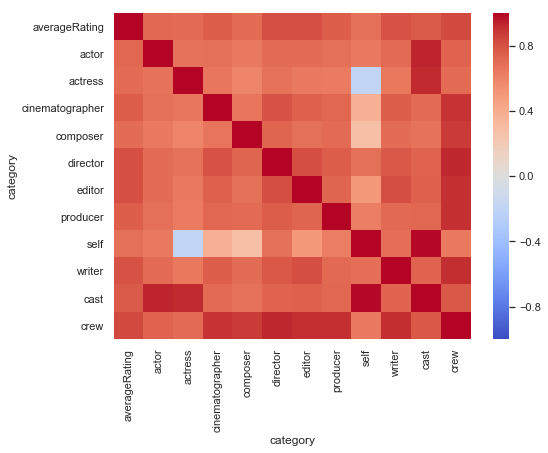

In [46]:
sns.heatmap(ratingMean.corr(),cmap='coolwarm',vmin=-1, vmax=1)

In [90]:
ratingMean.corr()

category,averageRating,actor,actress,cinematographer,composer,director,editor,producer,self,writer,cast,crew
category,,,,,,,,,,,,
averageRating,1.000000,0.726104,0.708245,0.760987,0.695773,0.804959,0.808876,0.752380,0.685968,0.800635,0.772634,0.832294
actor,0.726104,1.000000,0.672751,0.681690,0.646773,0.699123,0.700560,0.682226,0.643000,0.706815,0.945246,0.741208
actress,0.708245,0.672751,1.000000,0.662079,0.598628,0.671972,0.642895,0.640073,-0.195218,0.648657,0.929125,0.708584
cinematographer,0.760987,0.681690,0.662079,1.000000,0.666022,0.799865,0.747102,0.722064,0.380585,0.757368,0.708460,0.901950
composer,0.695773,0.646773,0.598628,0.666022,1.000000,0.727325,0.681567,0.704115,0.286288,0.697775,0.675349,0.879715
director,0.804959,0.699123,0.671972,0.799865,0.727325,1.000000,0.815178,0.762857,0.680114,0.773643,0.736504,0.932681
editor,0.808876,0.700560,0.642895,0.747102,0.681567,0.815178,1.000000,0.733675,0.501517,0.819257,0.743257,0.910715
producer,0.752380,0.682226,0.640073,0.722064,0.704115,0.762857,0.733675,1.000000,0.625519,0.717227,0.719330,0.907262
self,0.685968,0.643000,-0.195218,0.380585,0.286288,0.680114,0.501517,0.625519,1.000000,0.692676,0.990629,0.645674


### Observations:

1. The heatmap shows positive correlation between ratings and
    1. runtimeMinutes
    1. count of self

1. The heatmap shows negative correlation between ratings and
    1. count of actors
    1. count of actress
    1. count of total cast

In [47]:
calculate_pvalues(ratingMean.drop('tconst',axis=1))

,averageRating,actor,actress,cinematographer,composer,director,editor,producer,self,writer,cast,crew
category,,,,,,,,,,,,
averageRating,0,0,0,0,0,0,0,0,0,0,0,0
actor,0,0,0,0,0,0,0,0,0.0004,0,0,0
actress,0,0,0,0,0,0,0,0,0.753,0,0,0
cinematographer,0,0,0,0,0,0,0,0,0.0003,0,0,0
composer,0,0,0,0,0,0,0,0,0.0031,0,0,0
director,0,0,0,0,0,0,0,0,0,0,0,0
editor,0,0,0,0,0,0,0,0,0,0,0,0
producer,0,0,0,0,0,0,0,0,0,0,0,0
self,0,0.0004,0.753,0.0003,0.0031,0,0,0,0,0,0,0


### Observations:

All the variables show a positive correlation with the ratings, probably due to the fact that these variables have been calculated from the ratings itself.

### RatingMax dataset

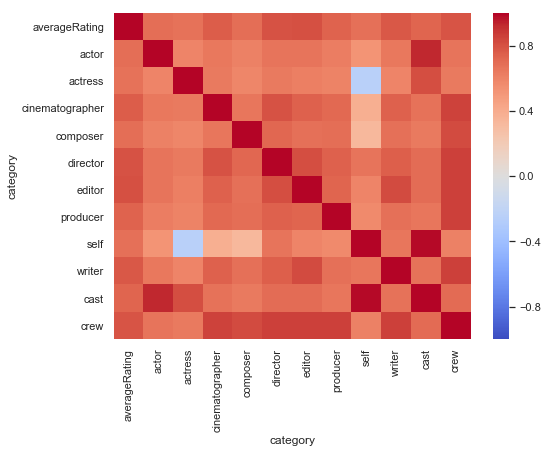

In [48]:
sns.heatmap(ratingMax.corr(),cmap='coolwarm',vmin=-1, vmax=1)

In [49]:
calculate_pvalues(ratingMax.drop('tconst',axis=1))

,averageRating,actor,actress,cinematographer,composer,director,editor,producer,self,writer,cast,crew
category,,,,,,,,,,,,
averageRating,0,0,0,0,0,0,0,0,0,0,0,0
actor,0,0,0,0,0,0,0,0,0.0057,0,0,0
actress,0,0,0,0,0,0,0,0,0.6904,0,0,0
cinematographer,0,0,0,0,0,0,0,0,0.0002,0,0,0
composer,0,0,0,0,0,0,0,0,0.0005,0,0,0
director,0,0,0,0,0,0,0,0,0,0,0,0
editor,0,0,0,0,0,0,0,0,0,0,0,0
producer,0,0,0,0,0,0,0,0,0,0,0,0
self,0,0.0057,0.6904,0.0002,0.0005,0,0,0,0,0,0,0


### Observations:

All the variables show a positive correlation with the ratings, probably due to the fact that these variables have been calculated from the ratings itself.

C:\Users\sony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


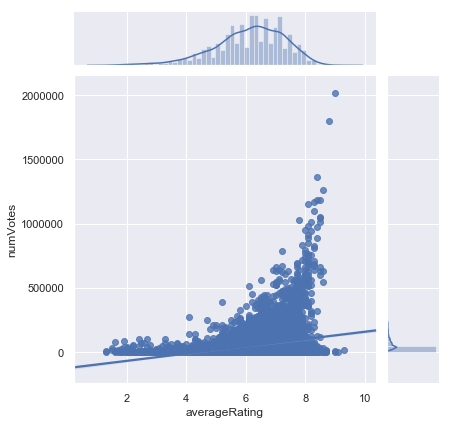

In [50]:
#plt.plot(titles.averageRating,titles.numVotes,marker='.', linestyle='none')
sns.jointplot('averageRating','numVotes', data=titles,
              kind='reg')
plt.show()

The variable numVotes could not be used to predict the ratings, as this will not be available to us during prediction. We have still plotted the above plot to get some insights, as follows:

1. Number of votes for a movie are positively correlated to the rating.
2. Most of the cases of high vote count are for highly rated movies. From this we can conclude that people are more likely to vote for movies if they like it. 